Exploring the Largest Companies in the United States by Revenue: A Web Scraping and Data Analysis Project

This project leverages Python for web scraping, data wrangling, and visualization to analyze the largest US companies by revenue. The dataset was scraped, cleaned, and analyzed to uncover trends and insights about industry performance and company success. Key skills demonstrated include web scraping, data cleaning, and data visualization with pandas, matplotlib, and seaborn. Future work could explore predictive modeling, sentiment analysis, and automated reporting.

In [3]:
# Import necessary libraries for web scraping
from bs4 import BeautifulSoup
import requests

In [4]:
# Select target URL and retrieve the webpage content
url = 'https://en.wikipedia.org/wiki/List_of_largest_companies_in_the_United_States_by_revenue'
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html')

In [ ]:
# Explore the contents of the webpage to locate correct table
soup.find('table')

In [ ]:
soup.find_all('table')[1]

In [7]:
#  Select table containing the list of the largest companies by revenue 
table = soup.find_all('table')[0]

In [8]:
# Extract table headers
table_titles = table.find_all('th')

In [9]:
# Clean and store the table headers
clean_table_titles = [title.text.strip() for title in table_titles]
print(clean_table_titles)

['Rank', 'Name', 'Industry', 'Revenue (USD millions)', 'Revenue growth', 'Employees', 'Headquarters']


In [10]:
# Import pandas for data manipulation
import pandas as pd

In [11]:
# Create empty DataFrame with column titles
df = pd.DataFrame(columns=clean_table_titles)

In [12]:
# Extract all table rows for data extraction
column_data = table.find_all('tr')

In [13]:
# Populate DataFrame by iterating through each row
for row in column_data[1:]: # Skip header row
    row_data = row.find_all('td') # Extract individual data cells
    individual_row_data = [data.text.strip() for data in row_data] # Cleaning data
    
    length = len(df) # Determine the length of DataFrame (number of rows)
    df.loc[length] = individual_row_data # Using dataframe length to index and populate table

In [14]:
# Inspect first five rows of Dataframe
print(df.head())

  Rank                Name                    Industry Revenue (USD millions)  \
0    1             Walmart                      Retail                648,125   
1    2              Amazon  Retail and cloud computing                574,785   
2    3               Apple        Electronics industry                383,482   
3    4  UnitedHealth Group                  Healthcare                371,622   
4    5  Berkshire Hathaway                Conglomerate                364,482   

  Revenue growth  Employees           Headquarters  
0           6.0%  2,100,000  Bentonville, Arkansas  
1          11.9%  1,525,000    Seattle, Washington  
2          -2.8%    161,000  Cupertino, California  
3          14.6%    440,000  Minnetonka, Minnesota  
4          20.7%    396,500        Omaha, Nebraska  


In [15]:
# Save DataFrame as CSV file (excluding the index)
df.to_csv(r'C:\Users\Liina\Desktop\MINU FAILID\PYTHON\Companies.csv', index =False)

In [16]:
# Import seaborn and matplotlib for data visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
# Display dataset information to check column types and missing values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Rank                    100 non-null    object
 1   Name                    100 non-null    object
 2   Industry                100 non-null    object
 3   Revenue (USD millions)  100 non-null    object
 4   Revenue growth          100 non-null    object
 5   Employees               100 non-null    object
 6   Headquarters            100 non-null    object
dtypes: object(7)
memory usage: 6.2+ KB
None


In [18]:
# Convert numerical columns to appropriate data types
num_cols = ['Rank',  'Revenue (USD millions)', 'Revenue growth', 'Employees']

# Remove thousand separators and percentage signs before conversion
df[num_cols] = df[num_cols].replace([",", "%"], "", regex=True).astype(float)
# Fill possible missing values with the median
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

In [19]:
# Recheck dataset information to confirm successful type conversion
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Rank                    100 non-null    float64
 1   Name                    100 non-null    object 
 2   Industry                100 non-null    object 
 3   Revenue (USD millions)  100 non-null    float64
 4   Revenue growth          100 non-null    float64
 5   Employees               100 non-null    float64
 6   Headquarters            100 non-null    object 
dtypes: float64(4), object(3)
memory usage: 6.2+ KB
None


In [20]:
# Display the first five rows after cleaning
print(df.head())

   Rank                Name                    Industry  \
0   1.0             Walmart                      Retail   
1   2.0              Amazon  Retail and cloud computing   
2   3.0               Apple        Electronics industry   
3   4.0  UnitedHealth Group                  Healthcare   
4   5.0  Berkshire Hathaway                Conglomerate   

   Revenue (USD millions)  Revenue growth  Employees           Headquarters  
0                648125.0             6.0  2100000.0  Bentonville, Arkansas  
1                574785.0            11.9  1525000.0    Seattle, Washington  
2                383482.0            -2.8   161000.0  Cupertino, California  
3                371622.0            14.6   440000.0  Minnetonka, Minnesota  
4                364482.0            20.7   396500.0        Omaha, Nebraska  


In [21]:
# Count missing values per column
print(df.isnull().sum())

Rank                      0
Name                      0
Industry                  0
Revenue (USD millions)    0
Revenue growth            0
Employees                 0
Headquarters              0
dtype: int64


In [22]:
# Display summary statistics for numerical columns
print(df.describe())

             Rank  Revenue (USD millions)  Revenue growth     Employees
count  100.000000              100.000000      100.000000  1.000000e+02
mean    50.500000           122346.090000        6.078000  1.626779e+05
std     29.011492           107882.041929       21.022996  2.669024e+05
min      1.000000            43452.000000      -41.700000  4.137000e+03
25%     25.750000            54608.500000       -6.175000  4.500000e+04
50%     50.500000            80296.000000        5.950000  8.650000e+04
75%     75.250000           149927.250000       13.025000  1.891625e+05
max    100.000000           648125.000000      125.900000  2.100000e+06


In [23]:
# Count duplicate rows in the dataset
print(df.duplicated().sum()) 

0


In [24]:
# Count unique occurrences of company names
print(df["Name"].value_counts())

Name
Walmart                     1
John Deere                  1
Cisco                       1
Allstate                    1
Publix                      1
                           ..
Verizon Communications      1
Meta Platforms              1
Valero Energy               1
Walgreens Boots Alliance    1
Best Buy                    1
Name: count, Length: 100, dtype: int64


In [25]:
# Aggregate revenue data by industry and rank industries by total revenue
grouped_by_industry_sum = df.groupby('Industry')['Revenue (USD millions)'].agg(['min','max','mean','sum']).sort_values(by='sum', ascending=False)
print(grouped_by_industry_sum )

                                          min       max           mean  \
Industry                                                                 
Retail                                43452.0  648125.0  161548.400000   
Healthcare                            64968.0  371622.0  220786.166667   
Financials                            45735.0  171912.0   98394.769231   
Petroleum industry                    48712.0  344582.0  135590.666667   
Technology and cloud computing        61860.0  307394.0  193723.000000   
Retail and cloud computing           574785.0  574785.0  574785.000000   
Conglomerate                          67954.0  364482.0  167118.666667   
Pharmaceutical industry               45006.0  139081.0   75368.333333   
Technology                            49954.0  134902.0   73691.500000   
Electronics industry                 383482.0  383482.0  383482.000000   
Automotive industry                  171842.0  176191.0  174016.500000   
Telecommunications                    

In [26]:
# The three industries with the highest total revenue are:
# 1. Retail  
# 2. Healthcare  
# 3. Financials  
# However, industries with the highest *average* revenue are:
# 1. Retail and cloud computing  
# 2. Electronics industry  
# 3. Health  
grouped_by_industry_average = df.groupby('Industry')['Revenue (USD millions)'].agg(['min','max','mean','sum']).sort_values(by='mean', ascending=False)
print(grouped_by_industry_average)

                                          min       max           mean  \
Industry                                                                 
Retail and cloud computing           574785.0  574785.0  574785.000000   
Electronics industry                 383482.0  383482.0  383482.000000   
Health                               276711.0  276711.0  276711.000000   
Pharmacy wholesale                   262173.0  262173.0  262173.000000   
Financial services                   239425.0  239425.0  239425.000000   
Healthcare                            64968.0  371622.0  220786.166667   
Technology and cloud computing        61860.0  307394.0  193723.000000   
Automotive industry                  171842.0  176191.0  174016.500000   
Conglomerate                          67954.0  364482.0  167118.666667   
Retail                                43452.0  648125.0  161548.400000   
Health insurance                     106374.0  195265.0  150819.500000   
Petroleum industry                    

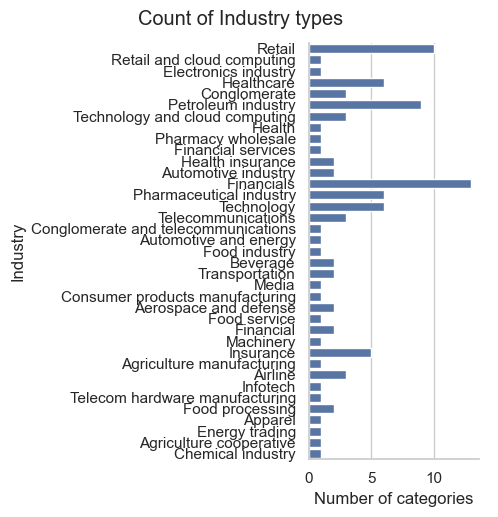

In [27]:
# Visualize the distribution of companies across different industries
sns.set(style="whitegrid")
g = sns.catplot(y= 'Industry',data=df, kind = 'count')
g.fig.suptitle('Count of Industry types', y = 1.03)
g.set(ylabel = "Industry", xlabel= "Number of categories")
plt.show()

In [28]:
# The three most represented industries in the dataset are:
# 1. Financials  
# 2. Retail  
# 3. Petroleum industry  

In [29]:
# Identify the top 10 companies by revenue growth
top_ten = df.head(10)
print(top_ten)

# Sort the top 10 companies by revenue growth in descending order
top_ten.sort_values(by='Revenue growth', ascending=False)

   Rank                  Name                        Industry  \
0   1.0               Walmart                          Retail   
1   2.0                Amazon      Retail and cloud computing   
2   3.0                 Apple            Electronics industry   
3   4.0    UnitedHealth Group                      Healthcare   
4   5.0    Berkshire Hathaway                    Conglomerate   
5   6.0            CVS Health                      Healthcare   
6   7.0            ExxonMobil              Petroleum industry   
7   8.0              Alphabet  Technology and cloud computing   
8   9.0  McKesson Corporation                          Health   
9  10.0               Cencora              Pharmacy wholesale   

   Revenue (USD millions)  Revenue growth  Employees  \
0                648125.0             6.0  2100000.0   
1                574785.0            11.9  1525000.0   
2                383482.0            -2.8   161000.0   
3                371622.0            14.6   440000.0   
4   

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
4,5.0,Berkshire Hathaway,Conglomerate,364482.0,20.7,396500.0,"Omaha, Nebraska"
3,4.0,UnitedHealth Group,Healthcare,371622.0,14.6,440000.0,"Minnetonka, Minnesota"
1,2.0,Amazon,Retail and cloud computing,574785.0,11.9,1525000.0,"Seattle, Washington"
5,6.0,CVS Health,Healthcare,357776.0,10.9,259500.0,"Woonsocket, Rhode Island"
9,10.0,Cencora,Pharmacy wholesale,262173.0,9.9,44000.0,"Conshohocken, Pennsylvania"
7,8.0,Alphabet,Technology and cloud computing,307394.0,8.7,182502.0,"Mountain View, California"
0,1.0,Walmart,Retail,648125.0,6.0,2100000.0,"Bentonville, Arkansas"
8,9.0,McKesson Corporation,Health,276711.0,4.8,48000.0,"Irving, Texas"
2,3.0,Apple,Electronics industry,383482.0,-2.8,161000.0,"Cupertino, California"
6,7.0,ExxonMobil,Petroleum industry,344582.0,-16.7,61500.0,"Spring, Texas"


In [30]:
# Check if there is a correlation between 'Revenue (USD millions)' and 'Employees'
df[['Revenue (USD millions)', 'Employees']].corr() 

,Revenue (USD millions),Employees
Revenue (USD millions),1.000000,0.699229
Employees,0.699229,1.000000


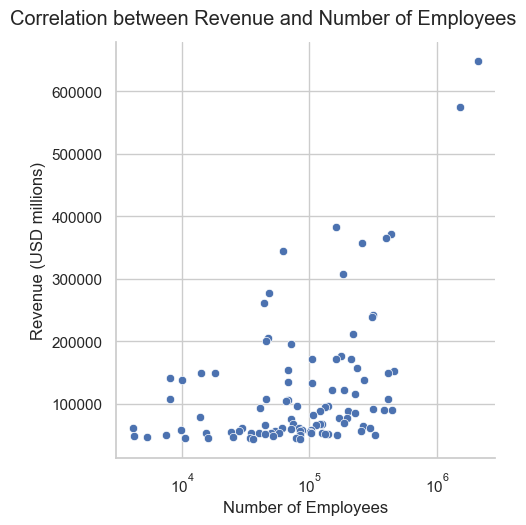

In [31]:
# Visualize the correlation with a scatter plot
g = sns.relplot(x='Employees', y='Revenue (USD millions)', data = df, kind = 'scatter')
g.fig.suptitle('Correlation between Revenue and Number of Employees', y = 1.03)
g.set(xlabel="Number of Employees", ylabel="Revenue (USD millions)")

# Set log scale for the x-axis (data spans large ranges)
g.set(xscale='log')
plt.show()

In [32]:
# The correlation coefficient between "Revenue (USD millions)" and "Employees" 
# is 0.699, indicating a strong positive correlation. 
# This trend is also visible in the scatter plot.

In [33]:
# Check if there is a correlation between 'Revenue growth' and 'Employees'
df[['Revenue growth', 'Employees']].corr() 

,Revenue growth,Employees
Revenue growth,1.000000,0.052155
Employees,0.052155,1.000000


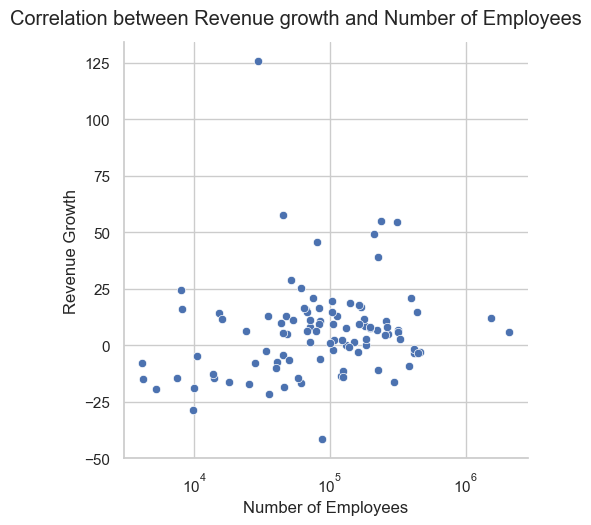

In [34]:
# There is no strong correlation between "Revenue growth" and "Employees" 
# because the correlation coefficient is 0.052.
# This is also reflected in the scatter plot.

g = sns.relplot(x='Employees', y='Revenue growth', data = df, kind = 'scatter')
g.fig.suptitle('Correlation between Revenue growth and Number of Employees', y = 1.03)
g.set(xlabel="Number of Employees", ylabel="Revenue Growth")
# Set log scale for the x-axis (data spans large ranges)
g.set(xscale='log')
plt.show()